In [2]:
!pip install pd
import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

In [3]:
projects = ["muduo", "leveldb", "xiaozhi-esp32"]

# Read and combine all CSVs
dfs = []
for project in projects:
    dfs.append(pd.read_csv(f"vuln_reports_{project}/cpp_vuln_findings_{project}.csv"))

# Concatenate all into one DataFrame
consolidated_df = pd.concat(dfs, ignore_index=True)
consolidated_df.to_csv("consolidated_vuln_findings.csv", index=False)
display(consolidated_df)


,Project_name,Tool_name,CWE_ID,Number_of_Findings,Is_In_CWE_Top_25?
0,muduo,Cppcheck,CWE-119,11,False
1,muduo,Cppcheck,CWE-398,85,False
2,muduo,Cppcheck,CWE-476,2,True
3,muduo,Cppcheck,CWE-561,1,False
4,muduo,Cppcheck,CWE-563,3,False
5,muduo,Cppcheck,CWE-570,2,False
6,muduo,Cppcheck,CWE-571,1,False
7,muduo,Cppcheck,CWE-685,1,False
8,muduo,Cppcheck,CWE-686,14,False
9,muduo,Cppcheck,CWE-758,29,False


In [31]:

cppcheck_cwes = set(consolidated_df.loc[consolidated_df["Tool_name"] == "Cppcheck", "CWE_ID"].dropna().unique())
print(f"Total unique Cppcheck's CWEs across all tools: {len(cppcheck_cwes)}")
semgrep_cwes = set(consolidated_df.loc[consolidated_df["Tool_name"] == "Semgrep", "CWE_ID"].dropna().unique())
print(f"Total unique Semgrep's CWEs across all tools: {len(semgrep_cwes)}")
ff_cwes = set(consolidated_df.loc[consolidated_df["Tool_name"] == "Flawfinder", "CWE_ID"].dropna().unique())
print(f"Total unique Flawfinder's CWEs across all tools: {len(ff_cwes)}")

semgrep_cwes = set([cwe.split(":")[0] for cwe in semgrep_cwes])

all_cwes = cppcheck_cwes.union(semgrep_cwes).union(ff_cwes)
print(f"Total unique CWEs across all tools: {len(all_cwes)}")

print("--------------------------------------")

# Coverage of Top 25 CWEs
n_cc = consolidated_df.loc[
    (consolidated_df["Tool_name"] == "Cppcheck") & (consolidated_df["Is_In_CWE_Top_25?"] == True),
    "CWE_ID"
].nunique()

n_sg = consolidated_df.loc[
    (consolidated_df["Tool_name"] == "Semgrep") & (consolidated_df["Is_In_CWE_Top_25?"] == True),
    "CWE_ID"
].nunique()

n_ff = consolidated_df.loc[
    (consolidated_df["Tool_name"] == "Flawfinder") & (consolidated_df["Is_In_CWE_Top_25?"] == True),
    "CWE_ID"
].nunique()

# Total Top 25 CWEs present in dataset
n_total = consolidated_df.loc[
    consolidated_df["Is_In_CWE_Top_25?"] == True, "CWE_ID"
].nunique()


print(f"Cppcheck covers {n_cc}/25 top CWEs")
print(f"Semgrep covers {n_sg}/25 top CWEs")
print(f"Flawfinder covers {n_ff}/25 top CWEs")
print(f"All tools combined cover {n_total}/25 top CWEs")

# Print results with percentage coverage
print(f"Cppcheck covers {n_cc}/{n_total} Top CWEs ({(n_cc/n_total)*100:.2f}%)")
print(f"Semgrep covers {n_sg}/{n_total} Top CWEs ({(n_sg/n_total)*100:.2f}%)")
print(f"Flawfinder covers {n_ff}/{n_total} Top CWEs ({(n_ff/n_total)*100:.2f}%)")
print(f"All tools combined cover {n_total}/25 Top CWEs (100%)")



Total unique Cppcheck's CWEs across all tools: 16
Total unique Semgrep's CWEs across all tools: 4
Total unique Flawfinder's CWEs across all tools: 11
Total unique CWEs across all tools: 29
--------------------------------------
Cppcheck covers 1/25 top CWEs
Semgrep covers 4/25 top CWEs
Flawfinder covers 3/25 top CWEs
All tools combined cover 8/25 top CWEs
Cppcheck covers 1/8 Top CWEs (12.50%)
Semgrep covers 4/8 Top CWEs (50.00%)
Flawfinder covers 3/8 Top CWEs (37.50%)
All tools combined cover 8/25 Top CWEs (100%)


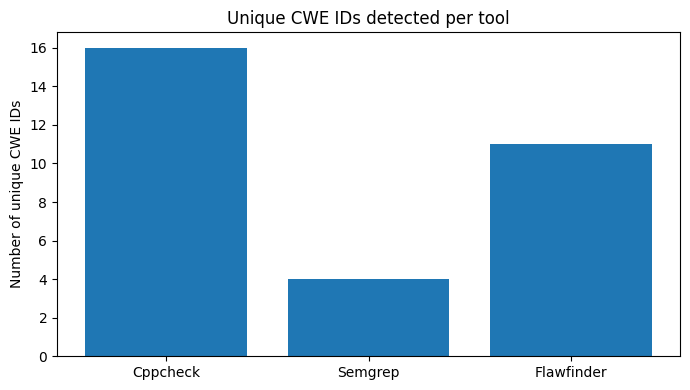

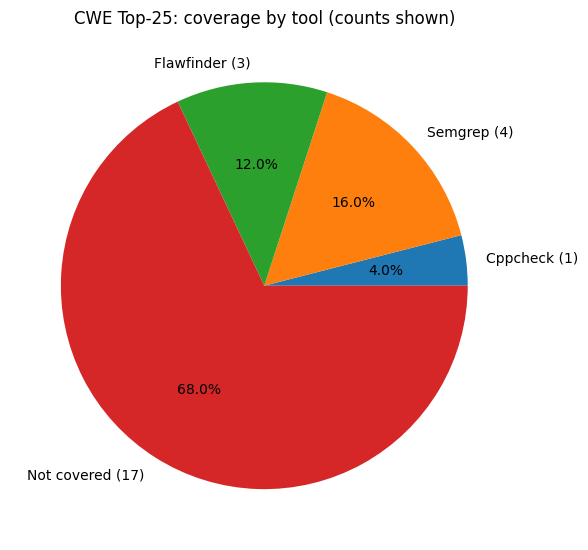

In [32]:
# --- Bar plot: unique CWE counts per tool ---
tools = ["Cppcheck", "Semgrep", "Flawfinder"]
unique_counts = [
    len(cppcheck_cwes), len(semgrep_cwes), len(ff_cwes)    
]
   
plt.figure(figsize=(7,4))
x = np.arange(len(tools))
plt.bar(x, unique_counts)
plt.xticks(x, tools)
plt.ylabel("Number of unique CWE IDs")
plt.title("Unique CWE IDs detected per tool")
plt.tight_layout()
plt.savefig("unique_cwes_per_tool.png", dpi=200)
plt.show()

# --- Pie chart: Top-25 CWE coverage ---
# Defensive checks and fallback values (assume Top-25 size = 25)
TOP25_TOTAL = 25

remaining = max(0, TOP25_TOTAL - n_total)

pie_values = [n_cc, n_sg, n_ff, remaining]
pie_labels = [
    f"Cppcheck ({n_cc})",
    f"Semgrep ({n_sg})",
    f"Flawfinder ({n_ff})",
    f"Not covered ({remaining})"
]

plt.figure(figsize=(6,6))
plt.pie(pie_values, labels=pie_labels, autopct=lambda pct: f"{pct:.1f}%")
plt.title("CWE Top-25: coverage by tool (counts shown)")

plt.tight_layout()
plt.savefig("top25_coverage_pie.png", dpi=200)
plt.show()


In [28]:
# Dictionary of tool → CWE sets
tool_sets = {
    "Cppcheck": cppcheck_cwes,
    "Flawfinder": ff_cwes,
    "Semgrep": semgrep_cwes
}

# Create IoU (Jaccard Index) matrix
tools = list(tool_sets.keys())
iou_matrix = pd.DataFrame(index=tools, columns=tools, dtype=float)

for t1 in tools:
    for t2 in tools:
        inter = tool_sets[t1] & tool_sets[t2]
        union = tool_sets[t1] | tool_sets[t2]
        iou = len(inter) / len(union) if len(union) > 0 else 0
        iou_matrix.loc[t1, t2] = round(iou, 3)

print("Tool × Tool IoU (Jaccard) Matrix:")
print(iou_matrix)


Tool × Tool IoU (Jaccard) Matrix:
            Cppcheck  Flawfinder  Semgrep
Cppcheck       1.000       0.038    0.000
Flawfinder     0.038       1.000    0.071
Semgrep        0.000       0.071    1.000
